#

# COGS 118C Final Project - Jupyter Notebook analysis
## Analyzing differing frequencies bands’ contributions to wake v. sleep states in rats

Calixto Calangi

Valerie Ortiz 

Indrani Vairagare   

### Setup

In [99]:
### code imported for conducting analysis ###

#We need to utilize SciPy io to read the .mat file of the data
#Since we're going to perform power spectral density and plotting them, we will be utilizing
#NumPy and Matplotlib

from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy import signal

In [100]:
#We want to load the rat LFP file using io
rat_data = io.loadmat('LFP_rat.mat',  squeeze_me = True)

#Since we want to look at the sleep v. wake states, we want to look
#at the header/dictionary keys
print(rat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'cells_wake', 'cells_sleep', 'lfp_wake', 'lfp_sleep', 't_wake', 't_sleep', 'cell_info', 'fs'])


What we glean from this is that there are the 'lfp_wake', 'lfp_sleep', 
't_wake' and 't_sleep' which are relevant for our analysis

The first two refer to the LFP during the two states

The latter two refer to the time periods in which they took place.

In [101]:
#parameters, set up based on rat_data.keys()
Fs = rat_data['fs'] #the sampling rate



For now, we'll plot what the LFP data looks like, then perform the PSD on it.

Text(0.5, 1.0, 'LFP during wake state')

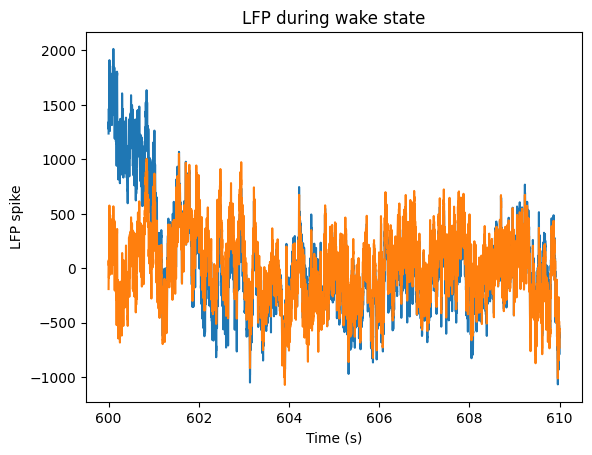

In [102]:
#Plot LFP
#Since the time from 600-900 is crowded, we can just look at the first
#10s
plt.plot(rat_data['t_wake'][:rat_data['fs']*10], rat_data['lfp_wake'][:,:rat_data['fs']*10].T)
plt.xlabel("Time (s)")
plt.ylabel("LFP spike")
plt.title("LFP during wake state")

Text(0.5, 1.0, 'LFP during sleep state')

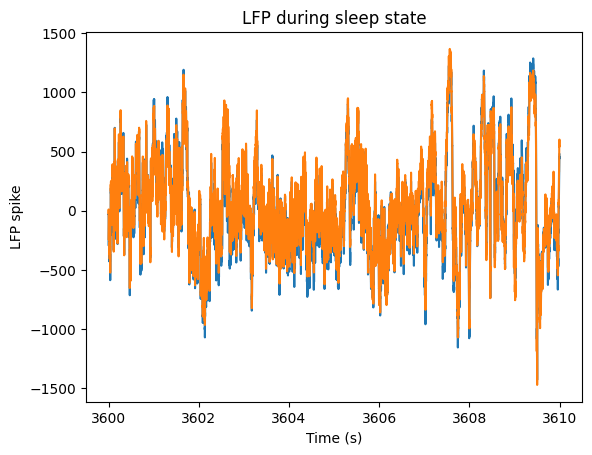

In [6]:
#LFP during sleep state
plt.plot(rat_data['t_sleep'][:rat_data['fs']*10],rat_data['lfp_sleep'][:,:rat_data['fs']*10].T)
plt.xlabel("Time (s)")
plt.ylabel("LFP spike")
plt.title("LFP during sleep state")

### Perform PSD on both the wake and sleep states

#### PSD on wake state

<function matplotlib.pyplot.show(close=None, block=None)>

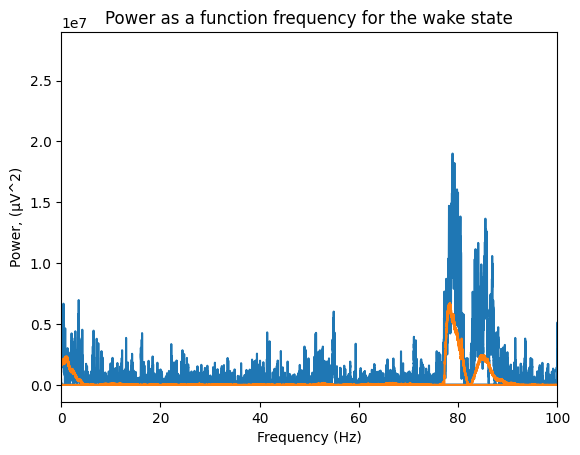

In [117]:
#Power first, FFT on LFP to confirm to the frequency domain
wake_dft = np.fft.fft(rat_data['lfp_wake'].T)
wake_power = np.abs(wake_dft) ** 2
wake_frequency = np.fft.fftfreq(len(rat_data['t_wake']), d=1/Fs)

#Plot wake state
plt.plot(wake_frequency, wake_power)
plt.title('Power as a function frequency for the wake state')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power, (μV^2)')
plt.xlim(0,100)
plt.show


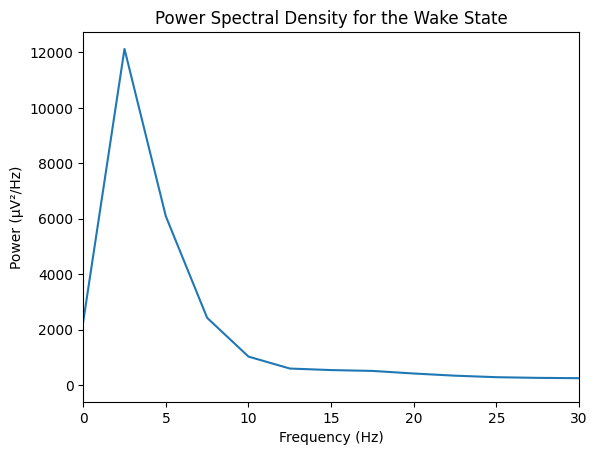

In [86]:
#perform PSD w/ Welch's on wake state
wake_frequencies, wake_psd = welch(rat_data['lfp_wake'], fs=Fs, nperseg=500)

#because there are two channels, we had to perform
#a mean on them to get the welch's method to work for plotting purposes
mean_wake_psd = np.mean(wake_psd, axis=0)
# Plot the PSD
plt.plot(wake_frequencies, mean_wake_psd)
plt.title('Power Spectral Density for the Wake State')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0, 30)
plt.show()

#### PSD on sleep state

<function matplotlib.pyplot.show(close=None, block=None)>

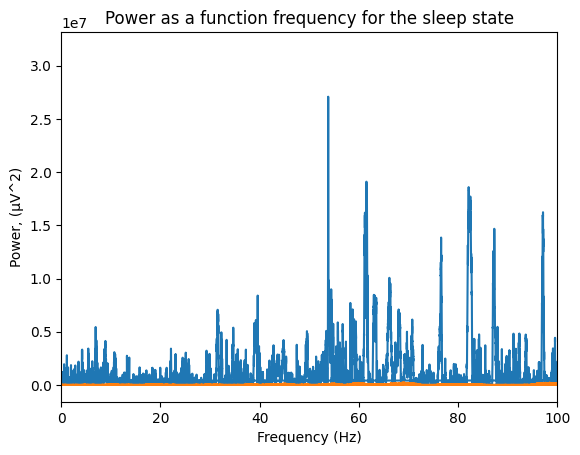

In [112]:
#Same thing for sleep state


sleep_dft = np.fft.fft(rat_data['lfp_sleep'].T)
sleep_power = np.abs(sleep_dft) ** 2
sleep_frequency = np.fft.fftfreq(len(rat_data['t_sleep']), d=1/Fs)

plt.plot(sleep_frequency, sleep_power)
plt.title('Power as a function frequency for the sleep state')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power, (μV^2)')
plt.xlim(0,100)
plt.show

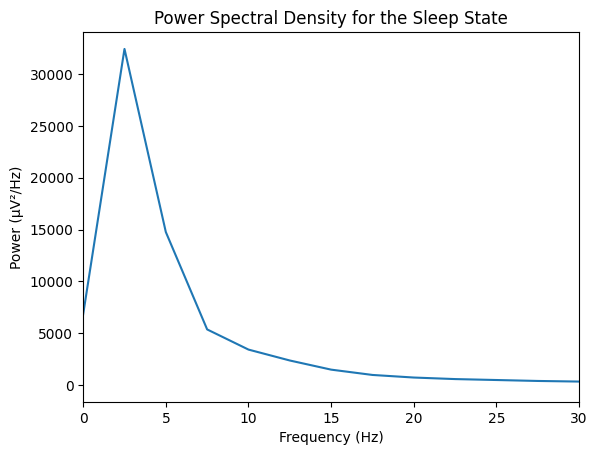

In [64]:
#PSD on sleep state
sleep_freq, sleep_psd = welch(rat_data['lfp_sleep'], fs=Fs, nperseg=500)

#because there are two channels, we had to perform
#a mean on them to get the welch's method to work for plotting purposes
sleep_psd = np.mean(sleep_psd, axis=0)
# Plot the PSD
plt.plot(sleep_freq, sleep_psd)
plt.title('Power Spectral Density for the Sleep State')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0, 30)
plt.show()


### Applying PSD with a filter on data

#### Wake state: keeping only frequencies > 5Hz

(0.0, 100.0)

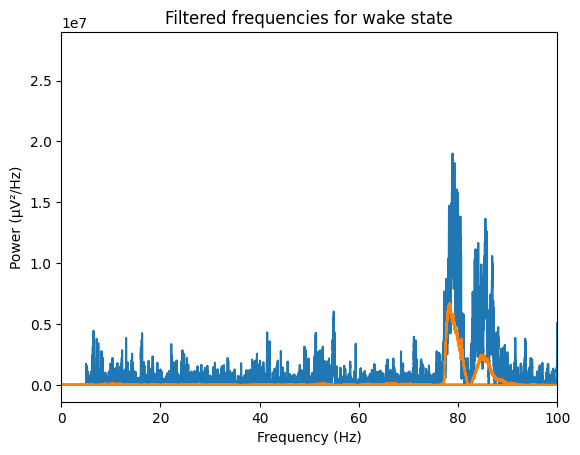

In [120]:
#For wake states, we should only care about frequencies from 5 upwards frequencies
ideal_filter = np.abs(wake_frequency) >= 5
wake_power_filter = np.abs(wake_dft.T * ideal_filter) **2


plt.plot(wake_frequency, wake_power_filter.T)
plt.title('Filtered frequencies for wake state')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0,100)

### Sleep state: only keep <5Hz

(0.0, 5.0)

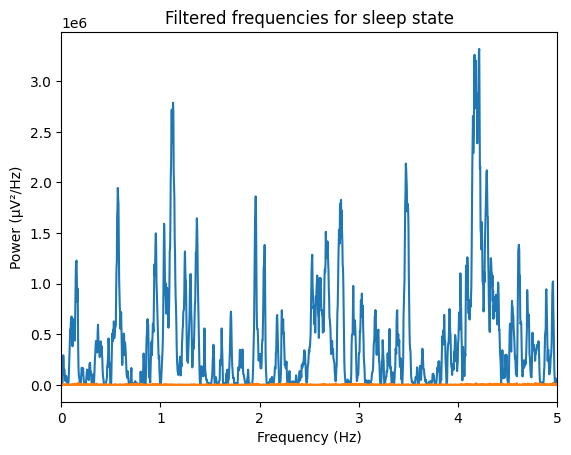

In [106]:
#The filter
sleep_if = np.abs(sleep_frequency) <= 5
sleep_pf = np.abs(sleep_dft.T * sleep_if) **2


plt.plot(sleep_frequency, sleep_pf.T)
plt.title('Filtered frequencies for sleep state')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (μV²/Hz)')
plt.xlim(0,100)
plt.xlim(0,5)